In [1]:
import matplotlib.pyplot as plt
import random

from matplotlib import gridspec

%matplotlib inline
%run Autoencoder.ipynb
%run preprocess.ipynb
%run kNN.ipynb
%run ANN.ipynb

In [2]:
seed = 7
np.random.seed(seed)

n_pre = Preprocess(is_neural=True)
k_pre = Preprocess(is_neural=False)

## Optimal hyperparameters obtained for ANN & k-NN

In [3]:
input_nodes = 784
hidden_nodes = 200
learning_rate = 0.3
batch_size = 1
epochs = 50

k = 3
sim = cosine_similarity

## Load MNIST Data

In [4]:
train_file = "mnist_train.csv"
test_file = "mnist_test.csv"

In [5]:
#load the mnist training data CSV file into a list
#train_data_file = open("mnist/mnist_train_100.csv", 'r') # open and read the 100 instances in the text file
train_data_file = open(train_file, 'r')
train_data_list = train_data_file.readlines() # read all lines into memory 
train_data_file.close() 
print("train set size: ", len(train_data_list))

#testing the network
#load the mnist test data CSV file into a list
test_data_file = open(test_file, 'r') # read the file 
test_data_list = test_data_file.readlines()
test_data_file.close()
print("test set size: ", len(test_data_list))

train set size:  60000
test set size:  10000


In [6]:
mini_training_data = n_pre.generate_mini_data(train_data_list, 1500)
# mini_testing_data = k_pre.generate_mini_data(test_data_list, 500)

X_train, y_train = n_pre.preprocess_data(mini_training_data)
X_test, y_test = k_pre.preprocess_data(test_data_list)

print(len(X_train))
print(len(X_test))

1500
10000


## Visualize input to autoencoder neural network

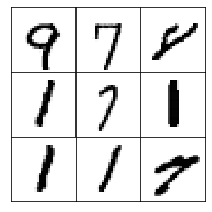

In [7]:
nrow = 10
ncol = 3

fig = plt.figure(figsize=(4, 10)) 

gs = gridspec.GridSpec(nrow, ncol, width_ratios=[1, 1, 1],
         wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845)

for i in range(3):
    for j in range(3):
        val = random.randint(0, len(X_train))
        plt.subplot(gs[i,j])
        plt.imshow(np.asfarray(X_train[val].flatten().reshape((28,28))), cmap='Greys', interpolation='None')
        plt.xticks([])
        plt.yticks([])

#plt.savefig('ae-input.png', dpi=300)
plt.show()

## Create autoencoder instance

In [8]:
n = NeuralNetwork(input_nodes, hidden_nodes, input_nodes, learning_rate, batch_size, epochs)

## Train autoencoder 

In [9]:
## train on itself
activations = n.train(X_train, X_train)

Training epoch#:  0
errors (SSE):  [51456.97913342]
Training epoch#:  1
errors (SSE):  [37637.25560239]
Training epoch#:  2
errors (SSE):  [36115.32033875]
Training epoch#:  3
errors (SSE):  [34476.79904203]
Training epoch#:  4
errors (SSE):  [33755.98982512]
Training epoch#:  5
errors (SSE):  [32388.22353619]
Training epoch#:  6
errors (SSE):  [31186.2875167]
Training epoch#:  7
errors (SSE):  [31513.70590891]
Training epoch#:  8
errors (SSE):  [29902.06268413]
Training epoch#:  9
errors (SSE):  [29825.56382695]
Training epoch#:  10
errors (SSE):  [29981.35218196]
Training epoch#:  11
errors (SSE):  [29643.646399]
Training epoch#:  12
errors (SSE):  [29921.145441]
Training epoch#:  13
errors (SSE):  [29790.73196001]
Training epoch#:  14
errors (SSE):  [29574.94606426]
Training epoch#:  15
errors (SSE):  [30109.59484075]
Training epoch#:  16
errors (SSE):  [29318.49506501]
Training epoch#:  17
errors (SSE):  [29944.76484066]
Training epoch#:  18
errors (SSE):  [29201.99357278]
Training

In [10]:
activations[:10]

[array([1.00000000e+000, 4.69394824e-094, 5.83693236e-064, 1.80599352e-111,
        8.05468859e-113, 4.98657506e-037, 9.39621820e-039, 5.60686467e-165,
        1.62376061e-027, 3.35149937e-008, 1.00000000e+000, 1.00000000e+000,
        6.55777986e-008, 6.83250144e-026, 3.27515467e-054, 3.47788467e-069,
        4.05013461e-020, 1.00000000e+000, 4.03009077e-124, 5.77040598e-024,
        1.91576228e-068, 1.18003957e-017, 4.26206020e-063, 1.00000000e+000,
        6.72254000e-092, 1.98084334e-072, 6.87907099e-072, 1.00000000e+000,
        1.00000000e+000, 2.01033920e-073, 1.70607875e-087, 3.18695909e-033,
        9.45915522e-024, 1.92562242e-065, 1.00000000e+000, 8.02194764e-096,
        1.00000000e+000, 1.97681654e-098, 1.74069477e-002, 9.95018547e-108,
        1.00000000e+000, 6.54247536e-051, 1.91876889e-047, 2.63965531e-124,
        7.76554614e-072, 2.75971619e-013, 2.95002634e-079, 7.21805041e-022,
        1.84575183e-099, 4.78574807e-129, 6.53092093e-042, 4.54919270e-047,
        2.64

In [11]:
train_inputs = []
train_targets = []

for instance, target in zip(activations, y_train):
    train_inputs.append(instance)
    train_targets.append(np.argmax(target))


knn = kNN(train_inputs, train_targets, weighted=True, sim=cosine_similarity)
knn.test_using_activations(X_test, y_test, n)

acc = knn.evaluate(knn.results)
acc

Testing...
Iteration# 200
Iteration# 400
Iteration# 600
Iteration# 800
Iteration# 1000
Iteration# 1200
Iteration# 1400
Iteration# 1600
Iteration# 1800
Iteration# 2000
Iteration# 2200
Iteration# 2400
Iteration# 2600
Iteration# 2800
Iteration# 3000
Iteration# 3200
Iteration# 3400
Iteration# 3600
Iteration# 3800
Iteration# 4000
Iteration# 4200
Iteration# 4400
Iteration# 4600
Iteration# 4800
Iteration# 5000
Iteration# 5200
Iteration# 5400
Iteration# 5600
Iteration# 5800
Iteration# 6000
Iteration# 6200
Iteration# 6400
Iteration# 6600
Iteration# 6800
Iteration# 7000
Iteration# 7200
Iteration# 7400
Iteration# 7600
Iteration# 7800
Iteration# 8000
Iteration# 8200
Iteration# 8400
Iteration# 8600
Iteration# 8800
Iteration# 9000
Iteration# 9200
Iteration# 9400
Iteration# 9600
Iteration# 9800
Iteration# 10000
Testing complete!


83.91

In [12]:
n.decoded_images[:2]

[array([[0.4325797 ],
        [0.44198029],
        [0.52218815],
        [0.47048939],
        [0.50488444],
        [0.53916317],
        [0.57580359],
        [0.58488009],
        [0.44448917],
        [0.49005228],
        [0.58711139],
        [0.46619465],
        [0.4676816 ],
        [0.41260274],
        [0.46949417],
        [0.4625167 ],
        [0.43150527],
        [0.56398216],
        [0.44530661],
        [0.53062947],
        [0.48957993],
        [0.54193211],
        [0.65523616],
        [0.43728934],
        [0.58347463],
        [0.48803587],
        [0.5220633 ],
        [0.5998705 ],
        [0.49768482],
        [0.55144921],
        [0.53814238],
        [0.48800868],
        [0.51845393],
        [0.56135924],
        [0.42651595],
        [0.47821133],
        [0.41045748],
        [0.47605408],
        [0.46747216],
        [0.51204084],
        [0.52420331],
        [0.52791378],
        [0.42760374],
        [0.5088296 ],
        [0.51338685],
        [0

## Visualize outputs from autoencoder neural network

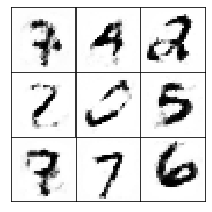

In [13]:
nrow = 10
ncol = 3

fig = plt.figure(figsize=(4, 10))

gs = gridspec.GridSpec(nrow, ncol, width_ratios=[1, 1, 1],
         wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845)

for i in range(3):
    for j in range(3):
        val = random.randint(0, len(n.decoded_images))
        ax = plt.subplot(gs[i,j])
        ax.imshow(np.asfarray(n.decoded_images[val].flatten().reshape((28,28))), cmap='Greys', interpolation='None')
        ax.set_xticks([])
        ax.set_yticks([])
    
#plt.savefig('ae-output-64-bs.png', dpi=300)
plt.show()

We see that the images appear quite blurry... likely meaning that the optimal hyperparameters obtained from Task1 & Task 2 are not optimal for our autencoder neural network.

## Visualize impact of varying batch size on model error with increasing epochs

In [15]:
model_list = []

batch_sizes = [1, 32, 64, 128]

for batch in batch_sizes: 
    n = NeuralNetwork(inputnodes=784, hiddennodes=200, outputnodes=784, learningrate=0.3, batch_size=batch, epochs=50)
    n.train(X_train, X_train)
    model_list.append(n)

Training epoch#:  0
errors (SSE):  [51425.20779286]
Training epoch#:  1
errors (SSE):  [37054.67082442]
Training epoch#:  2
errors (SSE):  [34845.55832084]
Training epoch#:  3
errors (SSE):  [32677.17567793]
Training epoch#:  4
errors (SSE):  [31832.91730282]
Training epoch#:  5
errors (SSE):  [31251.96527548]
Training epoch#:  6
errors (SSE):  [29861.72286691]
Training epoch#:  7
errors (SSE):  [30727.55244554]
Training epoch#:  8
errors (SSE):  [30014.60877551]
Training epoch#:  9
errors (SSE):  [29395.98560361]
Training epoch#:  10
errors (SSE):  [28504.65008738]
Training epoch#:  11
errors (SSE):  [27100.90272239]
Training epoch#:  12
errors (SSE):  [26759.01786566]
Training epoch#:  13
errors (SSE):  [26831.97316836]
Training epoch#:  14
errors (SSE):  [26075.49010639]
Training epoch#:  15
errors (SSE):  [25910.72360969]
Training epoch#:  16
errors (SSE):  [25466.6584816]
Training epoch#:  17
errors (SSE):  [25097.87954392]
Training epoch#:  18
errors (SSE):  [25854.81420784]
Trai

errors (SSE):  [55286.6304634]
Training epoch#:  7
errors (SSE):  [51858.62954797]
Training epoch#:  8
errors (SSE):  [49095.47878474]
Training epoch#:  9
errors (SSE):  [46902.60296738]
Training epoch#:  10
errors (SSE):  [45992.04419066]
Training epoch#:  11
errors (SSE):  [45141.10047654]
Training epoch#:  12
errors (SSE):  [42214.32404152]
Training epoch#:  13
errors (SSE):  [40587.0001137]
Training epoch#:  14
errors (SSE):  [39484.95422694]
Training epoch#:  15
errors (SSE):  [38750.43908002]
Training epoch#:  16
errors (SSE):  [37523.20150401]
Training epoch#:  17
errors (SSE):  [36109.44530632]
Training epoch#:  18
errors (SSE):  [35145.69377362]
Training epoch#:  19
errors (SSE):  [34661.44306552]
Training epoch#:  20
errors (SSE):  [33709.66864654]
Training epoch#:  21
errors (SSE):  [32631.76758466]
Training epoch#:  22
errors (SSE):  [31804.78484675]
Training epoch#:  23
errors (SSE):  [31118.72666985]
Training epoch#:  24
errors (SSE):  [30492.07239235]
Training epoch#:  2

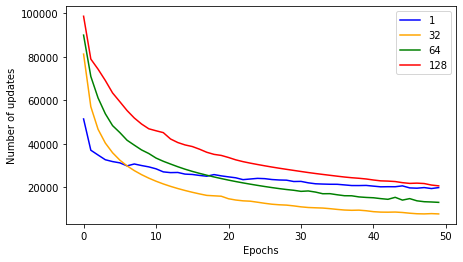

In [17]:
bs_1 = model_list[0]
bs_32 = model_list[1]
bs_64 = model_list[2]
bs_128 = model_list[3]

plt.figure(figsize=(7,4))
plt.plot(range(0, bs_1.ep), np.asfarray(bs_1.E), color='blue')
plt.plot(range(0, bs_32.ep), np.asfarray(bs_32.E), color='orange')
plt.plot(range(0, bs_64.ep), np.asfarray(bs_64.E), color='green')
plt.plot(range(0, bs_128.ep), np.asfarray(bs_128.E), color='red')
plt.legend([1, 32, 64, 128])
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

#plt.savefig('ae-error-loss.png', dpi=300)
plt.show()

## Test accuracy on k-NN with different batch sizes

In [30]:
mini_testing_data = k_pre.generate_mini_data(test_data_list, 500)
X_test, y_test = k_pre.preprocess_data(mini_testing_data)

batch_sizes = [1, 24, 32, 64, 128, 256]

bs_results = []

for batch in batch_sizes:
    n = NeuralNetwork(inputnodes=784, hiddennodes=200, outputnodes=784, learningrate=0.3, batch_size=batch, epochs=5)
    a = n.train(X_train, X_train)
    knn = kNN(a, train_targets, weighted=True, sim=cosine_similarity)
    knn.test_using_activations(X_test, y_test, n)
    bs_results.append(knn.evaluate(knn.results))
        
bs_results

Training epoch#:  0
errors (SSE):  [51960.03493546]
Training epoch#:  1
errors (SSE):  [37877.74842801]
Training epoch#:  2
errors (SSE):  [35309.24440845]
Training epoch#:  3
errors (SSE):  [33387.1145023]
Training epoch#:  4
errors (SSE):  [33421.10428205]
Testing...
Iteration# 200
Iteration# 400
Testing complete!
Training epoch#:  0
errors (SSE):  [76960.93388577]
Training epoch#:  1
errors (SSE):  [51024.79487679]
Training epoch#:  2
errors (SSE):  [41051.36096346]
Training epoch#:  3
errors (SSE):  [35053.28083818]
Training epoch#:  4
errors (SSE):  [30860.85527517]
Testing...
Iteration# 200
Iteration# 400
Testing complete!
Training epoch#:  0
errors (SSE):  [81181.19470488]
Training epoch#:  1
errors (SSE):  [57580.02351017]
Training epoch#:  2
errors (SSE):  [47175.81627901]
Training epoch#:  3
errors (SSE):  [40852.97626697]
Training epoch#:  4
errors (SSE):  [36464.24599623]
Testing...
Iteration# 200
Iteration# 400
Testing complete!
Training epoch#:  0
errors (SSE):  [88933.96

[75.4, 93.4, 92.2, 88.4, 84.6, 82.19999999999999]

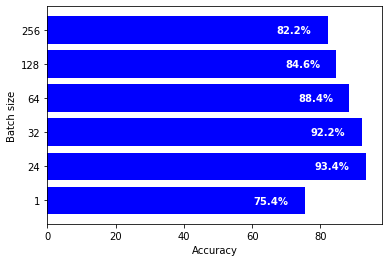

In [33]:
width = 0.8

objects = batch_sizes
y_pos = np.arange(len(objects))
performance = bs_results

plt.figure(figsize=(6,4))
 
plt.barh(y_pos, performance, width, align='center', color='blue')
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.ylabel('Batch size')

for i, v in enumerate(bs_results):
    plt.text(v - 15, i - 0.1, str(round(v, 2)) + '%', color='white', fontweight='bold')

plt.savefig('hybrid-bs.png', dpi=300)
plt.show()

## Test autoencoder with knn on my GIMP digits 

In [10]:
%run utils.ipynb

### Load GIMP digits

In [11]:
gimp_test_X, gimp_test_y = get_my_test_data("gimp")

gimp/*.png


In [12]:
knn = kNN(activations, y_train, k, sim, weighted=True)
knn.test_using_activations(gimp_test_X, gimp_test_y, n)

acc = knn.evaluate(knn.results)
acc

Testing...
Testing complete!


ZeroDivisionError: float division by zero

## Test autoencoder with knn on whiteboard digit images

In [161]:
hw_digits_X, hw_digits_y = get_my_test_data("hw_digits")

hw_digits/*.png
Loading...  hw_digits/img_1.png
Loading...  hw_digits/img_2.png
Loading...  hw_digits/img_3.png
Loading...  hw_digits/img_7.png
Loading...  hw_digits/img_6.png
Loading...  hw_digits/img_4.png
Loading...  hw_digits/img_5.png
Loading...  hw_digits/img_8.png
Loading...  hw_digits/img_9.png


In [162]:
knn = kNN(activations, y_train, k, sim, weighted=True)
knn.test_using_activations(hw_digits_X, hw_digits_y, n)

acc = knn.evaluate(knn.results)
acc

Testing...
Testing complete!


0.0

## Test autoencoder with knn on edited whiteboard digit images

In [165]:
hw_edited_X, hw_edited_y = get_my_test_data("hw_edited")

hw_edited/*.png
Loading...  hw_edited/img_1.png
Loading...  hw_edited/img_2.png
Loading...  hw_edited/img_3.png
Loading...  hw_edited/img_7.png
Loading...  hw_edited/img_6.png
Loading...  hw_edited/img_4.png
Loading...  hw_edited/img_5.png
Loading...  hw_edited/img_8.png
Loading...  hw_edited/img_9.png


In [167]:
knn = kNN(activations, y_train, k, sim, weighted=True)
knn.test_using_activations(hw_edited_X, hw_edited_y, n)

acc = knn.evaluate(knn.results)
acc

Testing...
Testing complete!


44.44444444444444